# Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\Ashwini\Documents\olx_car_data.csv")


In [3]:
df

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners,Price(in rupees)
0,Hyundai Grand I10,2015,56000.0,PETROL,1st,430000
1,Hyundai Xcent,2018,38000.0,PETROL,1st,575000
2,Honda Amaze,2017,68716.0,PETROL,1st,490000
3,Skoda Superb,2010,999999,PETROL,Second,300000
4,Hyundai I10,2012,90000,PETROL,Second,230000
...,...,...,...,...,...,...
5995,Maruti Suzuki Zen,2003,93141.0,PETROL,2nd,85000
5996,Maruti Suzuki Swift,2013,63000.0,DIESEL,2nd,320000
5997,Bmw X5,2017,55000.0,DIESEL,1st,4489000
5998,Hyundai I20,2012,62000.0,PETROL,1st,295000


In [4]:
df.shape

(6000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              6000 non-null   object
 1   Year               6000 non-null   object
 2   Kilometers Driven  6000 non-null   object
 3   Fuel Type          6000 non-null   object
 4   No of Owners       6000 non-null   object
 5   Price(in rupees)   6000 non-null   object
dtypes: object(6)
memory usage: 281.4+ KB


In [6]:
df.isnull().sum()

Brand                0
Year                 0
Kilometers Driven    0
Fuel Type            0
No of Owners         0
Price(in rupees)     0
dtype: int64

<AxesSubplot:>

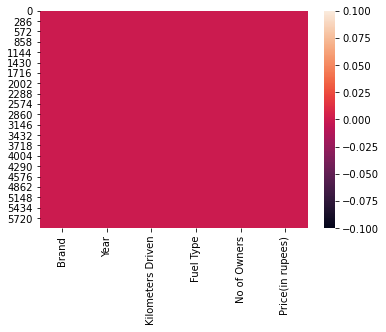

In [7]:
sns.heatmap(df.isnull())

In [8]:
df['Brand'].unique()

array(['Hyundai Grand I10', 'Hyundai Xcent', 'Honda Amaze',
       'Skoda Superb', 'Hyundai I10', 'Renault Kwid',
       'Maruti Suzuki Swift Dzire', 'Maruti Suzuki Celerio',
       'Maruti Suzuki Ciaz', 'Hyundai Santro Xing', 'Maruti Suzuki 800',
       'Maruti Suzuki Gypsy', 'Fiat Punto', 'Toyota Etios',
       'Ford Ecosport', 'Maruti Suzuki Alto 800', 'Ford Ikon',
       'Maruti Suzuki Wagon R', 'Audi A4', 'Hyundai I20',
       'Volkswagen Polo', 'Honda City', 'Hyundai Getz', 'Renault Triber',
       'Volkswagen Vento', 'Chevrolet Enjoy', 'Maruti Suzuki Alto K10',
       'Renault Duster', 'Ford Figo', 'Maruti Suzuki Ertiga',
       'Maruti Suzuki Zen', 'Maruti Suzuki Swift', 'Bmw X5', ' '],
      dtype=object)

In [9]:
df['Brand'].value_counts()

                             417
Maruti Suzuki Wagon R        300
Honda Amaze                  300
Hyundai Xcent                299
Maruti Suzuki 800            298
Hyundai Santro Xing          298
Maruti Suzuki Swift Dzire    177
Hyundai I20                  151
Ford Ikon                    150
Maruti Suzuki Alto K10       150
Hyundai Grand I10            150
Honda City                   150
Renault Duster               150
Maruti Suzuki Celerio        150
Bmw X5                       150
Renault Triber               150
Maruti Suzuki Zen            150
Renault Kwid                 150
Volkswagen Vento             150
Hyundai I10                  150
Maruti Suzuki Swift          149
Ford Ecosport                149
Maruti Suzuki Gypsy          149
Maruti Suzuki Alto 800       149
Maruti Suzuki Ertiga         149
Audi A4                      149
Maruti Suzuki Ciaz           149
Ford Figo                    149
Hyundai Getz                 149
Fiat Punto                   148
Chevrolet 

In [10]:
df['Year'].value_counts()

2015    898
2014    746
2011    596
2017    477
        417
2020    300
2009    299
2010    299
2012    298
2013    298
2018    178
2002    150
2007    150
2019    150
2003    150
2006    149
2004    149
2005    148
2016    148
Name: Year, dtype: int64

In [12]:
df['Kilometers Driven'].unique()

array(['56000.0', '38000.0', '68716.0', '999999', '90000', '9000.0',
       '82,000', '99', '79000.0', '62123.0', '56,865', '85,000', '20,000',
       '57,273', '30000.0', '75,000', '93000.0', '39,000', '73000.0',
       '60000.0', '28000.0', '61000.0', '70000', '65,820', '0', '31532.0',
       '27845.0', '88000.0', '33378.0', '59,500', '37266.0', '94300.0',
       '66000.0', '93141.0', '63000.0', '55000.0', '62000.0', '37000.0',
       ' ', '28,000', '31,532', '27,845'], dtype=object)

In [13]:
df['Fuel Type'].value_counts()

PETROL           3884
DIESEL           1523
                  417
CNG & HYBRIDS     176
Name: Fuel Type, dtype: int64

In [14]:
df['No of Owners'].unique()

array(['1st', 'Second', '4th', '2nd', '3rd', 'First', '--', ' '],
      dtype=object)

In [15]:
# removing the commas in kilometers value.

df['Kilometers Driven'] = df['Kilometers Driven'].str.replace(r',','')

In [16]:
df['Kilometers Driven'].unique

<bound method Series.unique of 0       56000.0
1       38000.0
2       68716.0
3        999999
4         90000
         ...   
5995    93141.0
5996    63000.0
5997    55000.0
5998    62000.0
5999    37000.0
Name: Kilometers Driven, Length: 6000, dtype: object>

In [18]:
df['No of Owners'] = df['No of Owners'].replace(['First'],'1st')

In [19]:
df['No of Owners'] = df['No of Owners'].replace(['Second'],'2nd')

In [20]:
df['No of Owners'].value_counts()

1st    3314
2nd    1370
--      598
        417
3rd     151
4th     150
Name: No of Owners, dtype: int64

In [21]:
df['Price(in rupees)'].unique()

array(['430000', '575000', '490000', '300000', '230000', '535000',
       '365000', '265000', '650000', '110000', '29000', '385000',
       '210111', '220000', '700000', '380000', '260000', '135000',
       '115000', '1695000', '271000', '285000', '515000', '70000',
       '71000', '590000', '200000', '350000', '395600', '160000',
       '750000', '175000', '720000', '639000', '85000', '320000',
       '4489000', '295000', '375000', ' '], dtype=object)

In [22]:
df['Price(in rupees)'].value_counts()

           417
365000     300
115000     150
490000     150
750000     150
720000     150
350000     150
515000     150
590000     150
85000      150
160000     150
4489000    150
29000      150
230000     150
265000     150
375000     150
430000     150
135000     150
535000     150
639000     149
650000     149
70000      149
260000     149
175000     149
1695000    149
385000     149
380000     149
320000     149
575000     149
200000     149
110000     149
395600     148
220000     148
295000     148
71000      148
300000     147
285000     147
700000      29
210111      27
271000       3
Name: Price(in rupees), dtype: int64

# Visualization

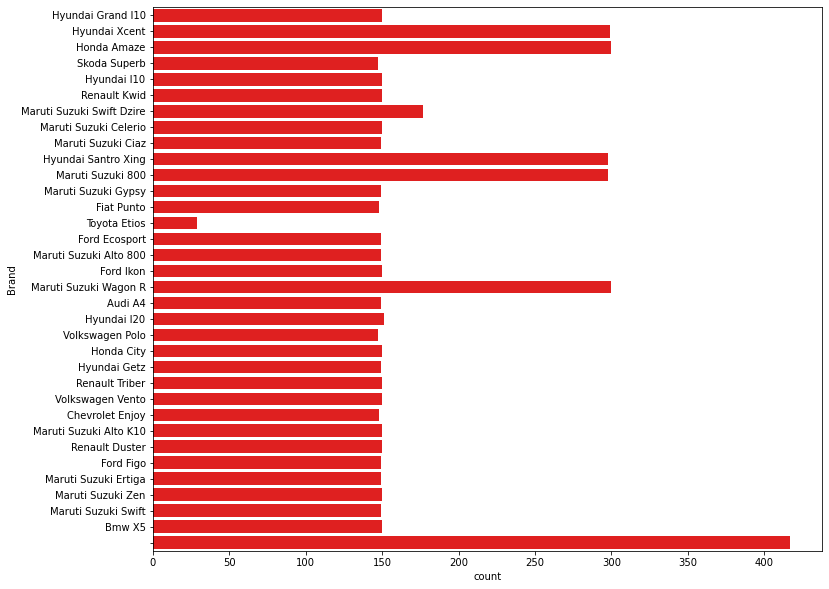

In [23]:
plt.figure(figsize=(12,10))
sns.countplot(y='Brand',data=df,color='red')
plt.show()

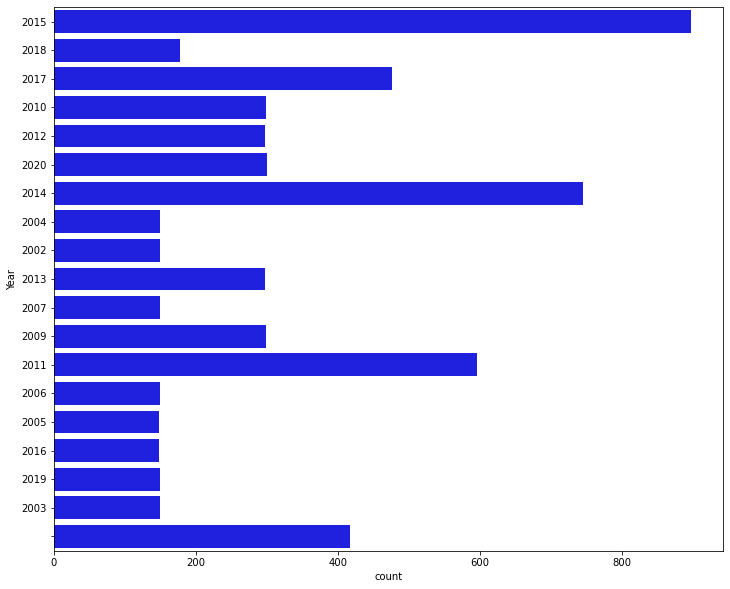

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(y='Year',data=df,color='blue')
plt.show()

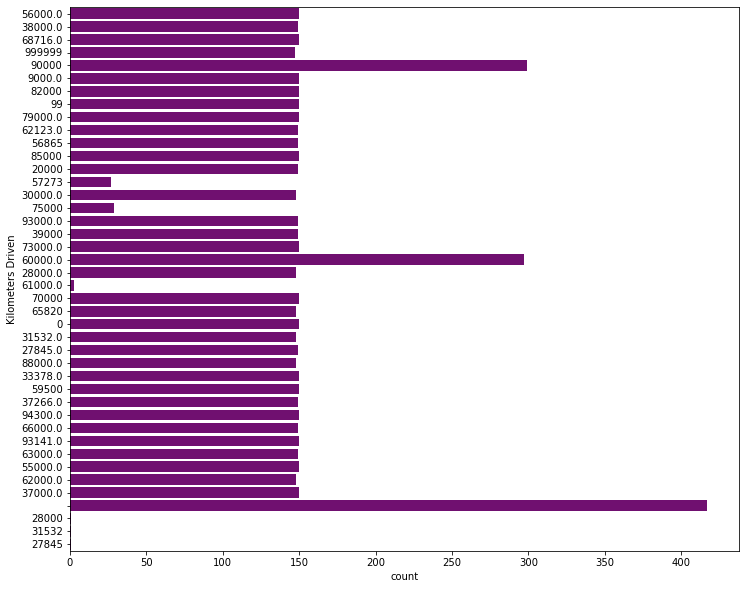

In [25]:
plt.figure(figsize=(12,10))
sns.countplot(y='Kilometers Driven',data=df,color='purple')
plt.show()

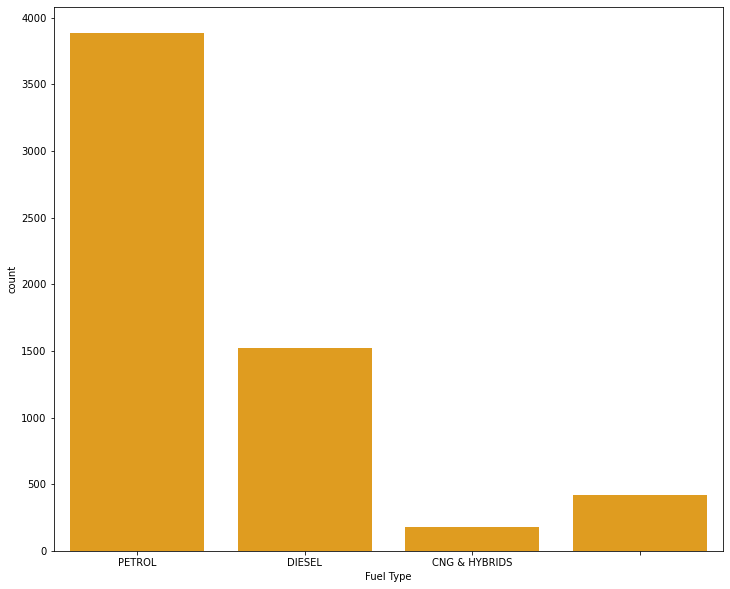

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(x='Fuel Type',data=df,color='orange')
plt.show()

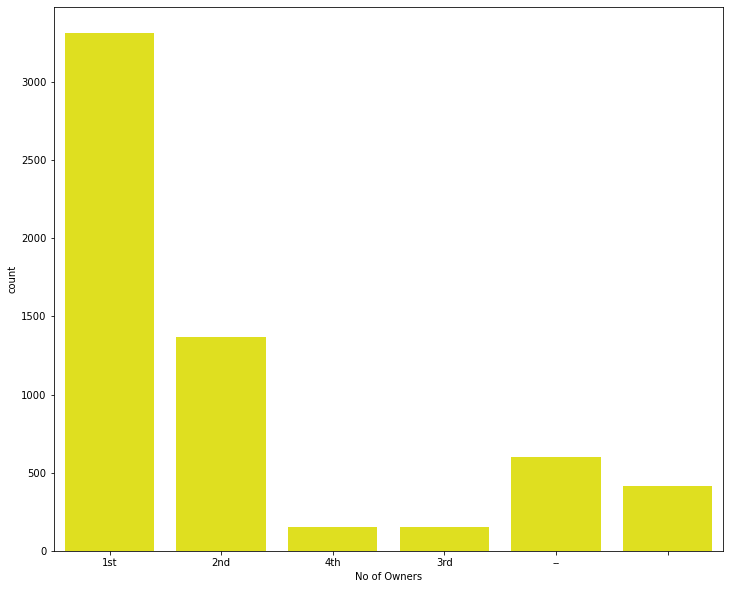

In [27]:
plt.figure(figsize=(12,10))
sns.countplot(x='No of Owners',data=df,color='yellow')
plt.show()

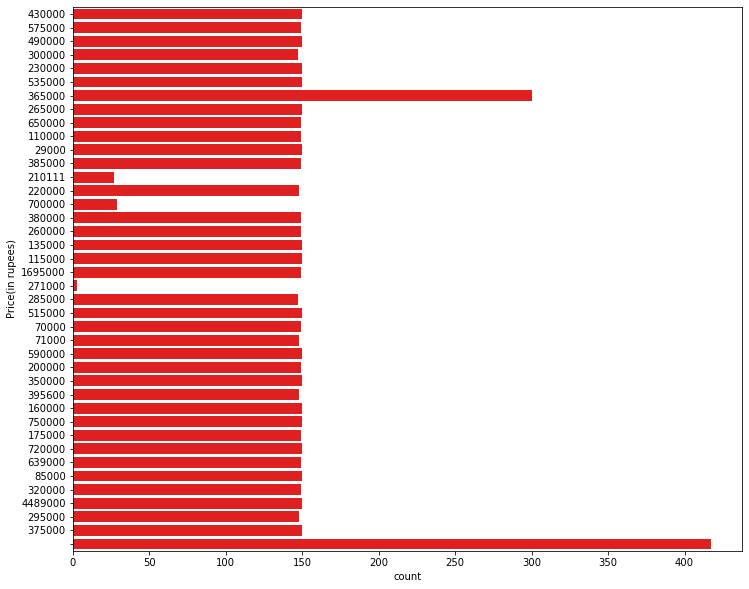

In [28]:
plt.figure(figsize=(12,10))
sns.countplot(y='Price(in rupees)',data=df,color='red')
plt.show()

<Figure size 1800x1296 with 0 Axes>

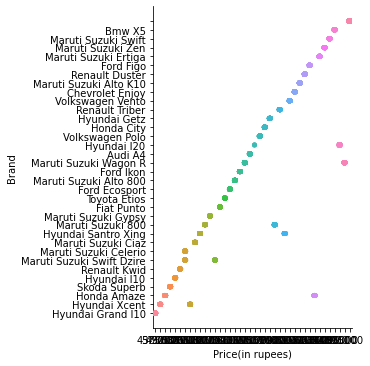

In [29]:
plt.figure(figsize=(25,18))
sns.catplot('Price(in rupees)','Brand',data=df)
plt.show()

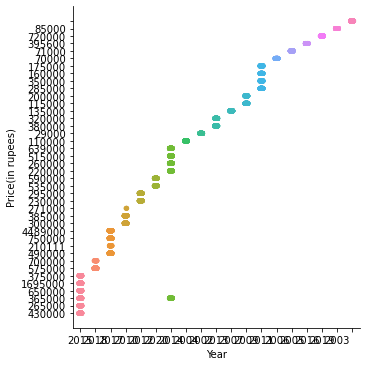

In [30]:
sns.catplot('Year','Price(in rupees)',data=df)

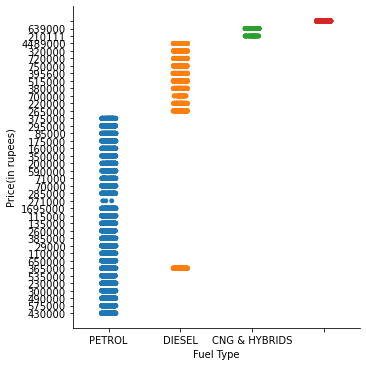

In [31]:
sns.catplot('Fuel Type','Price(in rupees)',data=df)

# Encoding

In [32]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Fuel Type']=labelencoder.fit_transform(df['Fuel Type'])
df['No of Owners']= labelencoder.fit_transform(df['No of Owners'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              6000 non-null   float64
 1   Year               6000 non-null   float64
 2   Kilometers Driven  6000 non-null   float64
 3   Fuel Type          6000 non-null   int64  
 4   No of Owners       6000 non-null   int64  
 5   Price(in rupees)   6000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 281.4 KB


<AxesSubplot:xlabel='Fuel Type', ylabel='Fuel Type'>

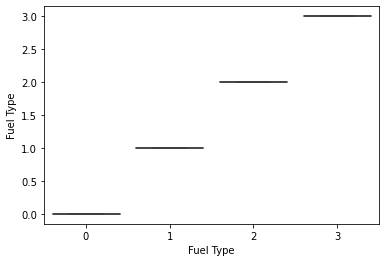

In [35]:
sns.boxplot('Fuel Type','Fuel Type',data=df)

<AxesSubplot:xlabel='No of Owners', ylabel='Price(in rupees)'>

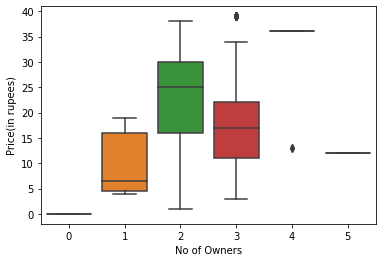

In [36]:
sns.boxplot('No of Owners','Price(in rupees)',data=df)

<AxesSubplot:xlabel='Year', ylabel='Kilometers Driven'>

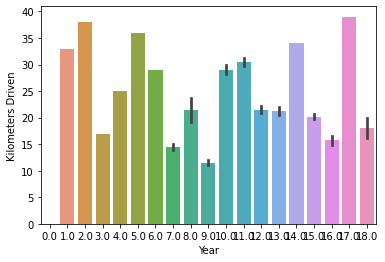

In [37]:
sns.barplot('Year','Kilometers Driven',data=df)

<AxesSubplot:xlabel='Fuel Type', ylabel='Year'>

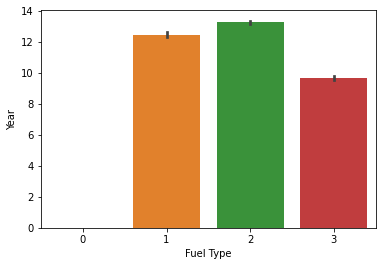

In [38]:
sns.barplot('Fuel Type','Year',data=df)

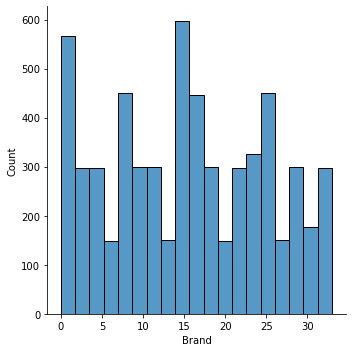

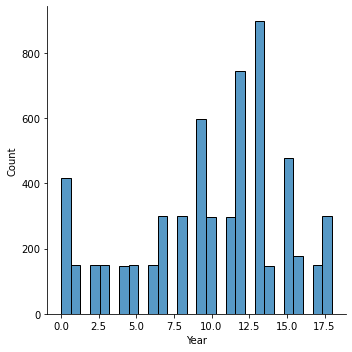

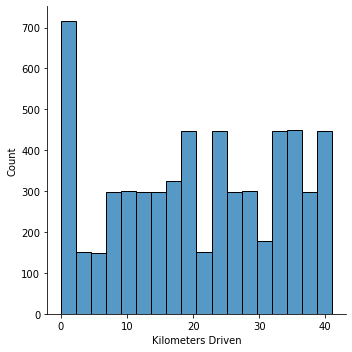

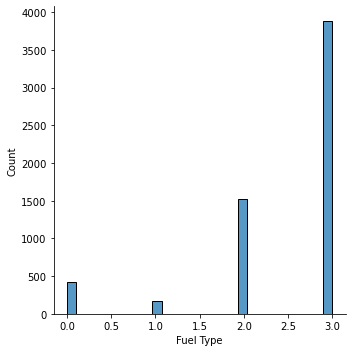

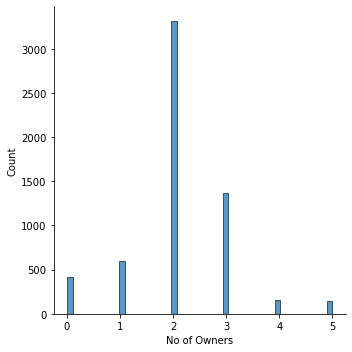

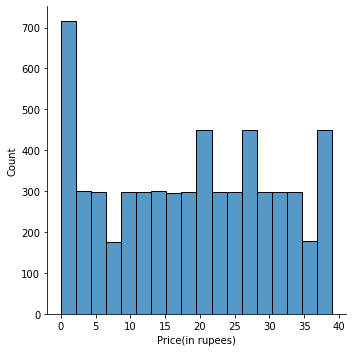

In [39]:
data=df.columns
for i in data:
    sns.displot(df[i])
    plt.show()

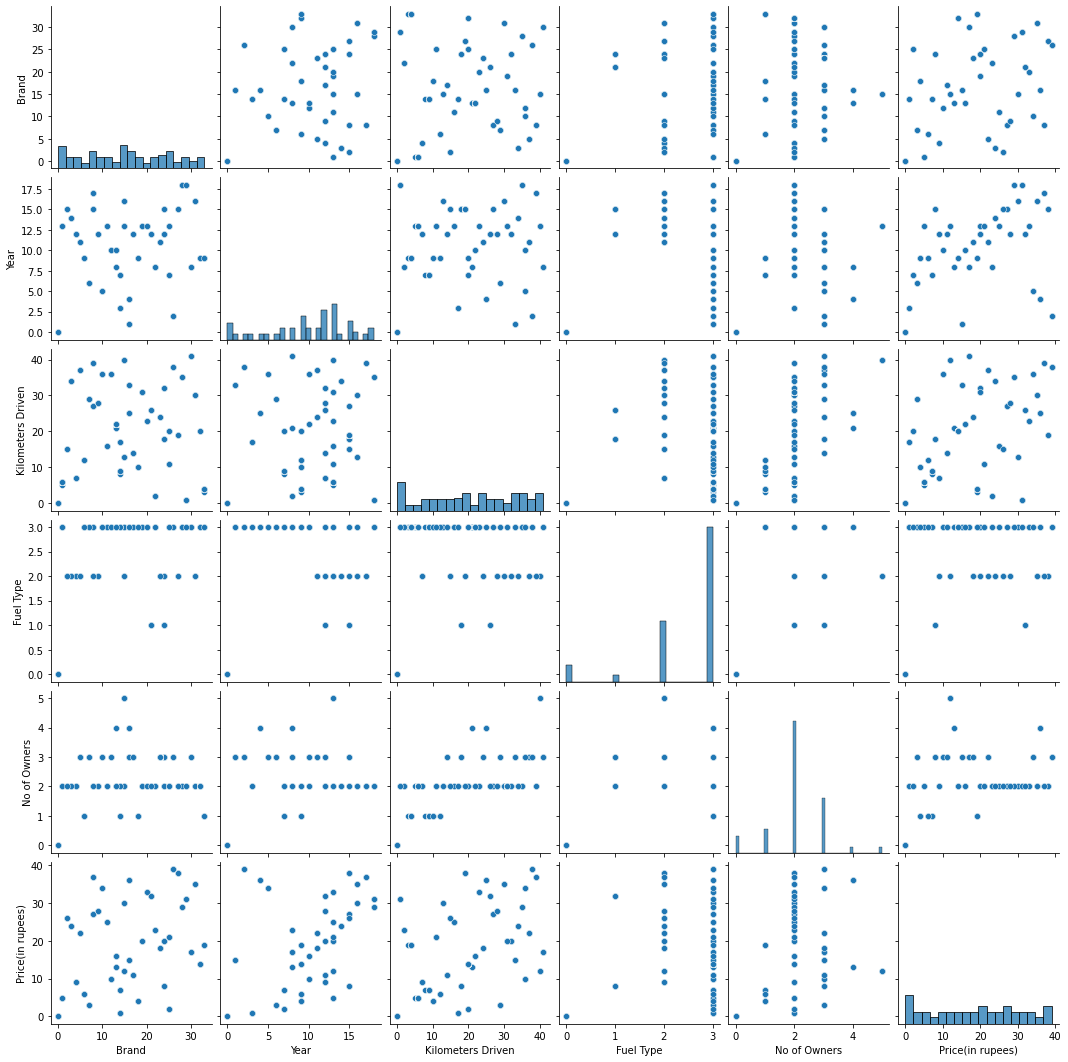

In [40]:
sns.pairplot(df)

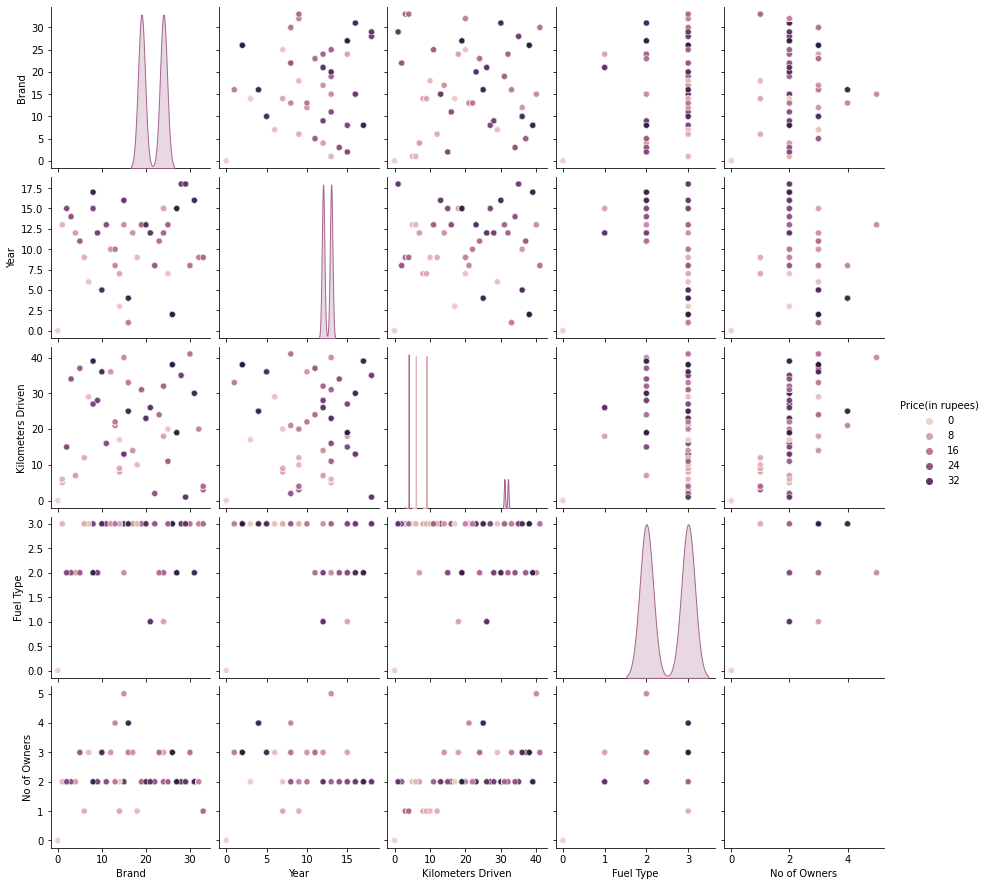

In [41]:
sns.pairplot(df,hue='Price(in rupees)')

In [42]:
df.describe()

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners,Price(in rupees)
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,15.393333,9.982000,20.939667,2.479000,2.115000,18.730833
std,9.598592,4.921454,12.598551,0.851673,0.958433,11.856959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,11.000000,2.000000,2.000000,9.000000
50%,15.000000,11.000000,22.000000,3.000000,2.000000,20.000000
75%,24.000000,13.000000,32.000000,3.000000,3.000000,29.000000
max,33.000000,18.000000,41.000000,3.000000,5.000000,39.000000


# Correlation

In [43]:
df.corr()

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners,Price(in rupees)
Brand,1.000000,0.204771,0.147224,0.442662,0.230403,0.338158
Year,0.204771,1.000000,0.168779,0.263584,0.189154,0.479037
Kilometers Driven,0.147224,0.168779,1.000000,0.229312,0.680626,0.413661
Fuel Type,0.442662,0.263584,0.229312,1.000000,0.420578,0.207588
No of Owners,0.230403,0.189154,0.680626,0.420578,1.000000,0.341083
Price(in rupees),0.338158,0.479037,0.413661,0.207588,0.341083,1.000000


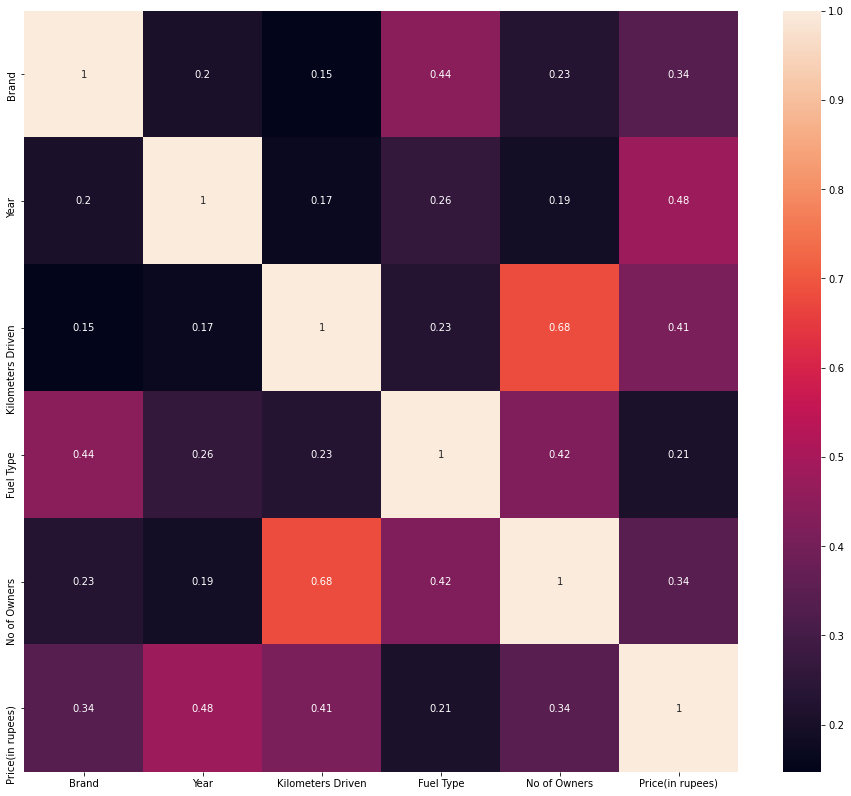

In [44]:
corr=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr,annot=True)
plt.show()

# Removing Outliers

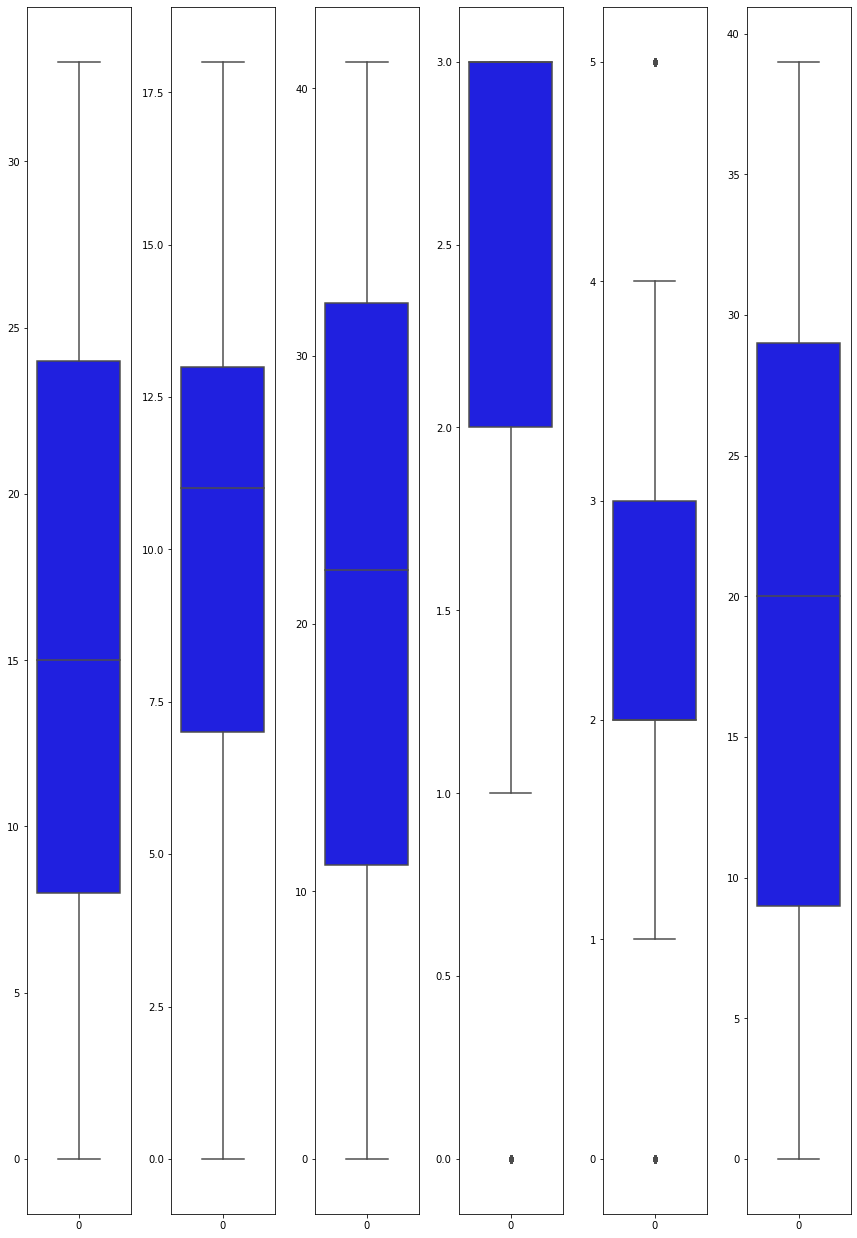

In [45]:
collist = df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

* we see very less outliers in the data

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [47]:
new_df=df[(z<3).all(axis=1)]

In [48]:
new_df.shape

(5850, 6)

In [49]:
df.shape

(6000, 6)

# Skewness:

In [50]:
df.skew()

Brand                0.052744
Year                -0.523967
Kilometers Driven   -0.122471
Fuel Type           -1.765411
No of Owners         0.148433
Price(in rupees)    -0.025464
dtype: float64

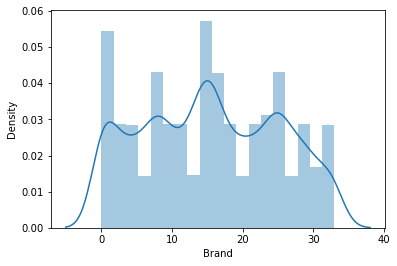

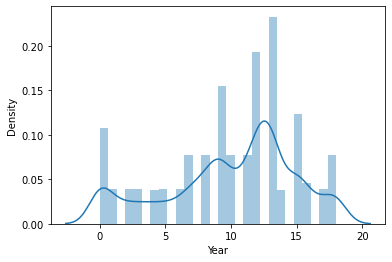

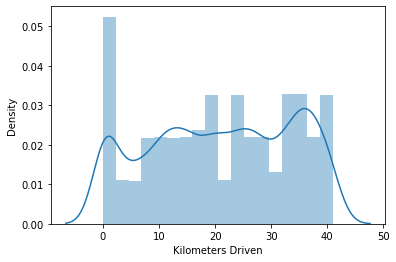

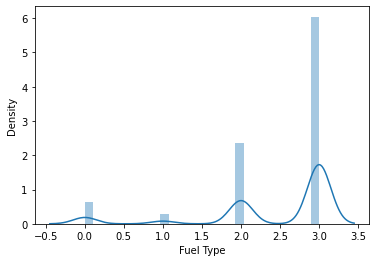

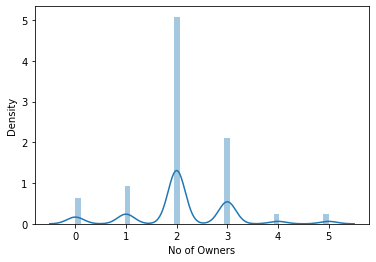

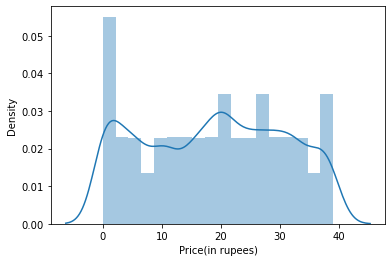

In [51]:
for i in df:
    sns.distplot(df[i])
    plt.show()

In [52]:
for i in df.columns:
    
    # removing skewness using transformation method
    if df.skew().loc[i]>0.5:
        df[i]=np.log1p(df[i])
        
        #we areusing square method to remove skewness
        if df.skew().loc[i]<0.5:
            df[i]=np.square(df[i])

In [53]:
df.skew()

Brand                0.052744
Year                -0.523967
Kilometers Driven   -0.122471
Fuel Type           -1.765411
No of Owners         0.148433
Price(in rupees)    -0.025464
dtype: float64

# Spliting the data into Feature and Target

In [54]:
x=df.drop(columns='Price(in rupees)')
y=df['Price(in rupees)']

In [55]:
x.shape

(6000, 5)

In [56]:
y.shape

(6000,)

In [57]:
x.head()

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners
0,11.0,13.0,16.0,3,2
1,15.0,16.0,13.0,3,2
2,8.0,15.0,27.0,3,2
3,30.0,8.0,41.0,3,3
4,12.0,10.0,36.0,3,3


In [58]:
y.head()

0    25.0
1    30.0
2    27.0
3    17.0
4    10.0
Name: Price(in rupees), dtype: float64

# Scalling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i

# Train Test Split the data

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=177)

In [63]:
x_train.shape

(4200, 5)

In [64]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)

In [65]:
print(f"R2 score:{acc*100}%")

R2 score:43.6305509715516%


In [66]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:100.0%


In [67]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:99.99999749042989%


In [68]:
ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:40.44599578077674%


In [69]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:99.8135798160431%


In [71]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=r2_score(y_test,pred)

print(f"R2 Score: {acc*100}%")

R2 Score: 99.92532460439786%


In [72]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)


print(f"R2 Score: {acc*100}%")

R2 Score: 87.91083955045978%


# Cross Validation

In [73]:
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print("Cross validation score for Linear Regression is :",cvlr)

Cross validation score for Linear Regression is : 0.3884759812772919


In [74]:
cvdtr=cross_val_score(dtr,x,y,cv=5).mean()
print("Cross validation score for Decision Tree Regression is:",cvdtr)

Cross validation score for Decision Tree Regression is: 0.9690287524563818


In [75]:
cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvrfr)

Cross validation score for Random Forest Regressor is: 0.9695647323604394


In [76]:
cvls=cross_val_score(ls,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvls)

Cross validation score for Random Forest Regressor is: 0.36878631628378267


In [77]:
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvknn)

Cross validation score for Random Forest Regressor is: 0.9782412198789132


In [78]:
cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvgbr)

Cross validation score for Random Forest Regressor is: 0.9880080461259404


In [79]:
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvsvr)

Cross validation score for Random Forest Regressor is: 0.8566645057955331


# Overfitting & Underfitting

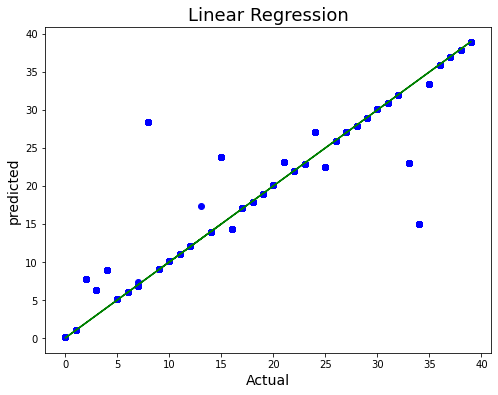

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='b')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Hyper Parameter Tuning:

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
parameter={'max_depth':[100,200,500,1000],
          'n_estimators':[10,100,500],
          'subsample':[0.001,0.01,0.1,1.0],
          'random_state':[50,100,200]}

In [83]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [84]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [100, 200, 500, 1000],
                         'n_estimators': [10, 100, 500],
                         'random_state': [50, 100, 200],
                         'subsample': [0.001, 0.01, 0.1, 1.0]})

In [85]:
GCV.best_params_

{'max_depth': 100, 'n_estimators': 500, 'random_state': 50, 'subsample': 1.0}

In [86]:
car_price_final=GradientBoostingRegressor(max_depth=100, n_estimators=500, random_state=50, subsample=1.0)
car_price_final.fit(x_train,y_train)
pred=car_price_final.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

100.0


# Saving the model

In [87]:
import joblib
joblib.dump(car_price_final,'Car_price_prediction(submission).pkl')

['Car_price_prediction(submission).pkl']

# Conclusion

In [89]:
Conclusion = pd.DataFrame([Car_price_model.predict(x_test)[:],gbr.predict(x_test)[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
Predicted,15.000000,12.000000,4.000000,1.615701e-08,24.000000,28.000000,31.000000,3.00000,19.000000,19.000000,...,33.000000,1.615701e-08,37.000000,10.000000,5.000000,30.000000,20.000000,37.000000,38.000000,9.000000
Original,15.052928,12.380229,5.111348,-8.604932e-02,23.912117,27.497938,31.150626,3.61037,18.970422,18.970422,...,32.658343,-8.604932e-02,36.785034,10.837653,5.596419,29.676984,20.307261,36.785034,37.491504,9.131715
